### Question 3
By extending the wave-prop.py, make a code to simulate twodimensional propagation of a wave (use the result of Q2). Create an interference 
pattern of two circular waves originating from two different points in the middle of 
the simulation domain. You can do that by putting driving terms (e.g. u 𝑖,𝑗 =
𝐴 sin 𝜔𝑡) at the origins of the waves.

1. import package

In [1]:
#import package
import numpy as np
import matplotlib.pyplot as plt

2. Set the variables

In [3]:
#input
xmax = float(4) #max value of x-coordinate
ymax = float(4) #max value of y-coordinate
dx = float(0.01) #differential for x of calculation 
dy = float(0.01) # differential for y of calculation
dt = float(0.005) # time interval
f = float(4) #frequency of wave
D = int(50)  #distance between wave source and center 
smax = int(100) # max. num. steps of iteration
dsav = int(100) # show figures every this step 

3. Set the simulation factor

#### Refer to Question 2 : e discretized equations for two-dimensional wave propagation

The wave equation for 2 dimension is ${{ \partial^2 \psi}\over{\partial x^2}}+{{\partial^2 \psi}\over{\partial y^2}}-{{1}\over{v^2}}{{\partial^2 \psi}\over{\partial t^2}}=0$

By FCTS approximation, 
${{{\psi^{n}_{i+1 j}}-2\psi^{n}_{i j}+{\psi^{n}_{i-1 j}}}\over{dx^2}}+{{{\psi^{n}_{i j+1}}-2\psi^{n}_{i j}+{\psi^{n}_{i j-1}}}\over{dy^2}}-{{1}\over{v^2}}{{{\psi^{n+1}_{i j}}-2\psi^{n}_{i j}+{\psi^{n-1}_{i j}}}\over{dt^2}}=0$

Therefore,
$\psi^{n+1}_{ij} =v^{2}{{dt^2}\over{dx^2}}(\psi^{n}_{i+1 j}-2\psi^{n}_{i j}+\psi^{n}_{i-1 j})+v^{2}{{dt^2}\over{dy^2}}(\psi^{n}_{i j+1}-2\psi^{n}_{i j}+\psi^{n}_{i j-1})+2\psi^{n}_{ij}-\psi^{n-1}_{ij} \\= 2(1-v^{2}{{dt^2}\over{dx^2}}-v^{2}{{dt^2}\over{dy^2}})\psi^{n}_{ij}+v^{2}{{dt^2}\over{dx^2}}(\psi^{n}_{i+1 j}+\psi^{n}_{i-1 j})+v^{2}{{dt^2}\over{dy^2}}(\psi^{n}_{i j+1}+\psi^{n}_{i j-1})-\psi^{n-1}_{ij}$

$\alpha_{x} = v{{dt}\over{dx}}\\ \alpha_{y} = v{{dt}\over{dy}}$

$\psi^{n+1}_{ij}= 2(1-\alpha_{x}^2-\alpha_{y}^2)\psi^{n}_{ij}+\alpha_{x}^2(\psi^{n}_{i+1 j}+\psi^{n}_{i-1 j})+\alpha_{y}^{2}(\psi^{n}_{i j+1}+\psi^{n}_{i j-1})-\psi^{n-1}_{ij}$




Set the simulation parameters for v =1

alx =$ \alpha_{x}$
aly = $\alpha_{y}$

In [10]:
# Simulation parameters
alx=dt/dx   # alpha parameter
aly=dt/dy
ax=alx**2  
ay=aly**2
b=2*(1-ax-ay)

w=2.0*np.pi*f

$\psi^{n+1}_{ij}= b\psi^{n}_{ij}+ax(\psi^{n}_{i+1 j}+\psi^{n}_{i-1 j})+ay(\psi^{n}_{i j+1}+\psi^{n}_{i j-1})-\psi^{n-1}_{ij}$

4. Prepare mesh and coordinate

In [5]:
# Mesh
x=np.arange(0,xmax+dx,dx)
y=np.arange(0,ymax+dy,dy)
X,Y=np.meshgrid(x,y)

In [7]:
#index of center of x coordinate and y coordinate
cntry=int(0.5*ymax/dy)
cntrx=int(0.5*xmax/dx)

5. wave function

In [8]:
u1= 0*X # wave function
ubuf1= 0*X #tmp
uo1= 0*X  # t = n-1 wavwe function

6. Use recurrence relation we find in question2

$\psi^{n+1}_{ij}= b\psi^{n}_{ij}+ax(\psi^{n}_{i+1 j}+\psi^{n}_{i-1 j})+ay(\psi^{n}_{i j+1}+\psi^{n}_{i j-1})-\psi^{n-1}_{ij}$

In [ ]:
s = 2
while s <= smax*2 :
    #wave source : sine wave is making at (cntrx, cntry-D),(cntrx,cntr+D)
    u1[cntrx,cntry-D] = np.sin(w*s*dt); u1[cntrx,cntry+D] = np.sin(w*s*dt) 
    #store u_n in ubuf1
    ubuf1[1:-1,1:-1] = u1[1:-1,1:-1] #store u_n in ubuf1
    # update u1 from u_n to u_n+1
    u1[1:-1,1:-1] = b*u1[1:-1,1:-1] +ax*(u1[2:,1:-1]+u1[0:-2,1:-1])+ax*(u1[1:-1,2:] + u1[1:-1,0:-2]) - uo1[1:-1,1:-1] 
    #update uo1 from u_n-1 to u_n to use next recurrence
    uo1[1:-1,1:-1] = ubuf1[1:-1,1:-1]
    """
    #snap shot once dsav :But it does not work in jupyter notebook. So, I treat it as comment. But it will work in other IDE
    if s % dsav == 0: cs = plt.imshow(u1); plt.colorbar(cs); plt.clim(-1, 1); plt.draw(); plt.pause(
        0.01); plt.clf()
    s += 1
    """
    s+=1

In [ ]:
#draw wave when time dt*smax

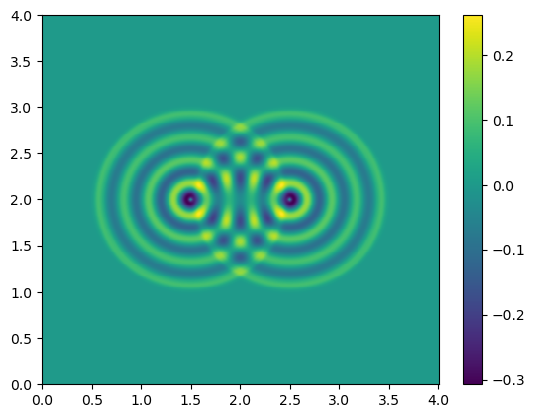

In [13]:
cs=plt.pcolormesh(X,Y,u1); plt.colorbar(cs); plt.show()